In [12]:
import pandas as pd
import numpy as np
import glob

# Set folder paths chemin d'accés aux fichiers de donnée de Pjmax
cmip6_path = 'C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/from_Models' 
persian_path = 'C:/Users/Mahdi-ZIANE/OneDrive/Persian_cdr_Pjmax'
observed_path = 'C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/rocessed_Precip_Record/observed'


In [14]:
# Load CMIP6 data
cmip6_files = glob.glob(cmip6_path + "/*.csv")


# Load PERSIAN data 
persian_files = glob.glob(persian_path + "/*.csv")

# Load observed data
observed_files = glob.glob(observed_path + "/*.csv")

In [20]:
# Read in each data file ( pour le point à lala setti load les données en csv issues de PERSIAN_CDR et CanESM5 CMIP6 ClimMode)
obs_df = pd.read_csv('C:/Users/Mahdi-ZIANE/OneDrive\pluie_obs\processed_Precip_Record/observed/160705_lala_setti.csv')
persian_df = pd.read_csv('C:/Users/Mahdi-ZIANE/OneDrive/Persian_cdr_Pjmax/LALA SETTI_annual_max.csv')
cmip6_df = pd.read_csv('C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/from_Models\\pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_LALA SETTI.csv')



### Statistiques de la serie de pluie ( Missing Vals ,moyenne, ecart-type...etc)

In [66]:
print('nombre de valeurs manquantes =',obs_df['annuel'].isnull().sum())

nombre de valeurs manquantes = 11


In [61]:
# Statistics on observed rainfall in lala setti
obs_df.describe()

,annuel,year
count,49.000000,60.000000
mean,58.126531,1985.500000
std,27.614306,17.464249
min,25.200000,1956.000000
25%,40.700000,1970.750000
50%,49.600000,1985.500000
75%,65.500000,2000.250000
max,157.000000,2015.000000


In [58]:
# Statistics on PERSIAN_CDR rainfall in lala setti POINT
persian_df.describe()

,datetime,precip
count,41.000000,41.000000
mean,2003.000000,20.528814
std,11.979149,9.049711
min,1983.000000,9.820000
25%,1993.000000,13.440000
50%,2003.000000,19.750000
75%,2013.000000,23.840000
max,2023.000000,46.740000


In [60]:
# Statistics on CanESM5 model from CMIP6  rainfall DATA in lala setti point
cmip6_df.describe()

,lat,lon,pr
count,6.500000e+01,65.0,65.000000
mean,3.488252e+01,0.0,18.645468
std,5.012506e-14,0.0,7.778352
min,3.488252e+01,0.0,6.374943
25%,3.488252e+01,0.0,13.551702
50%,3.488252e+01,0.0,17.599793
75%,3.488252e+01,0.0,21.725961
max,3.488252e+01,0.0,51.249858


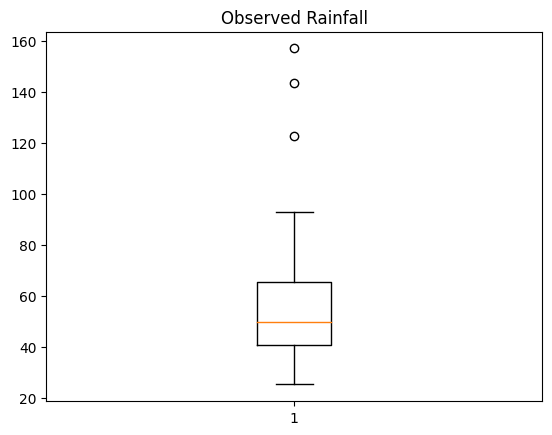

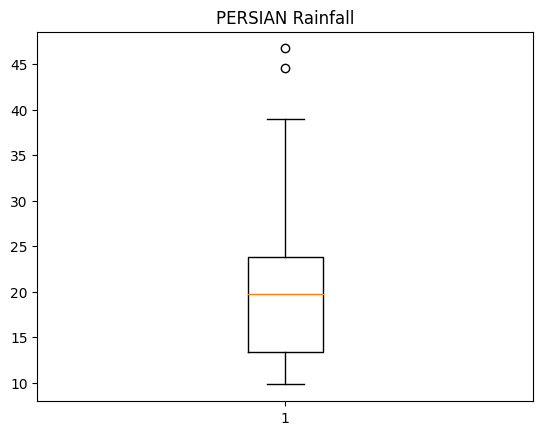

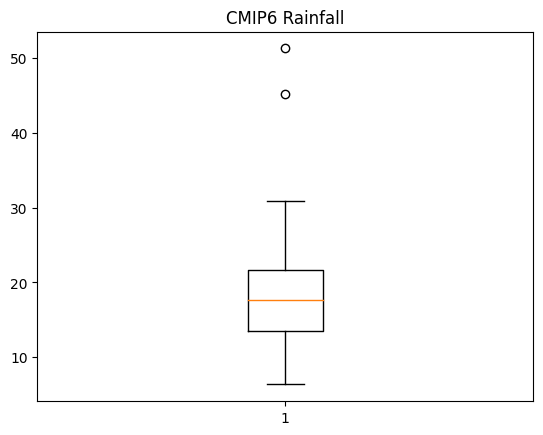

In [54]:
import matplotlib.pyplot as plt

# Plot observed data
fig, ax = plt.subplots()
ax.boxplot(obs_df['annuel'].dropna())
ax.set_title('Observed Rainfall')

# Plot PERSIAN data
fig, ax = plt.subplots()
ax.boxplot(persian_df['precip'] )
ax.set_title('PERSIAN Rainfall') 

# Plot CMIP6 data
fig, ax = plt.subplots()
ax.boxplot(cmip6_df['pr'])
ax.set_title('CMIP6 Rainfall')

plt.show()

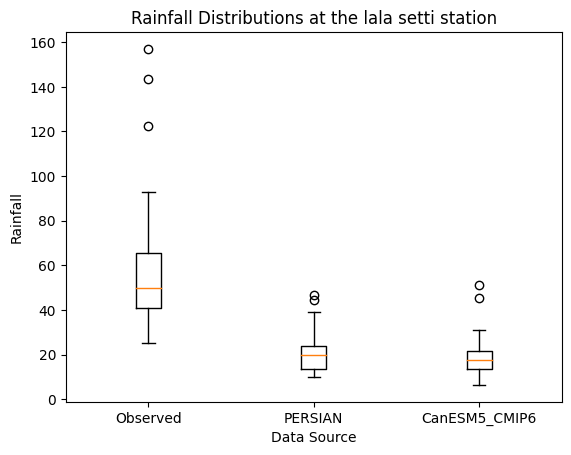

In [63]:
import matplotlib.pyplot as plt

# Create figure and axes
fig, ax = plt.subplots()

# Plot observed data
ax.boxplot(obs_df['annuel'].dropna(), positions=[1])

# Plot PERSIAN data
ax.boxplot(persian_df['precip'], positions=[2])

# Plot CMIP6 data
ax.boxplot(cmip6_df['pr'], positions=[3]) 

# Set title and axis labels
ax.set_title('Rainfall Distributions at the lala setti station')
ax.set_xlabel('Data Source')
ax.set_ylabel('Rainfall')

# Set x-axis ticks and labels
ax.set_xticks([1,2,3]) 
ax.set_xticklabels(['Observed','PERSIAN','CanESM5_CMIP6'])


# Save the plot as a PNG image
plt.savefig('lala_setti_boxplot.png')

plt.show()

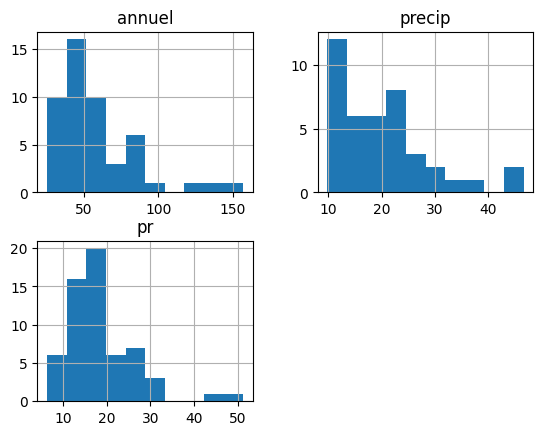

In [57]:
rainfall_df.hist()

# Save the plot as a PNG image
plt.savefig('lala_setti_hist.png')

## Observations:
 on voit que les series de pluie ne sont pas en accord , du fait que la moyenne de chaque serie et grossierement differente des autres, les precipitations venant du PERSIAN_CDR (precip) et du modele climatique CanESM5 de CMIP6 (pr) sont       sous-éstimées, comparées aux données d'observation dans la station de lala setti (annuel)
====> existence d'un BIAIS

## à faire:
1- voir comment se comportent les autres modeles issus de CMIP6 comparés données d'observation et PERCIAN_CDR dans la meme station lala setti.

2- consolider les données des modeles pour chause station ( 25 csv files à 5 csv files)

In [85]:
import glob

csv_files = glob.glob('C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models/*.csv')

for file in csv_files:
    print(file)


C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_BENSEKRANE.csv
C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_LALA SETTI.csv
C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_M LILIA HENNAIA.csv
C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_PIERRE DU CHAT.csv
C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_Sabra.csv
C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_TLEMCEN MN.csv
C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Prec

In [91]:
import pandas as pd

# List of file paths
file_paths = [
    "C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/from_Models/pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_BENSEKRANE.csv",
    "C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/from_Models/pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_LALA SETTI.csv",
    "C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/from_Models/pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_M LILIA HENNAIA.csv",
    "C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/from_Models/pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_PIERRE DU CHAT.csv",
    "C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/from_Models/pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_Sabra.csv",
    "C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/from_Models/pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_TLEMCEN MN.csv"
]

# Empty list to hold dataframes
dfs = []

# Loop through file paths and read each file into a dataframe
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Now dfs is a list of dataframes


In [92]:
dfs

[    Unnamed: 0        lat  lon         pr
 0   1950-12-31  34.882521  0.0  17.232189
 1   1951-12-31  34.882521  0.0  15.104480
 2   1952-12-31  34.882521  0.0  11.854207
 3   1953-12-31  34.882521  0.0  27.432330
 4   1954-12-31  34.882521  0.0  11.926978
 ..         ...        ...  ...        ...
 60  2010-12-31  34.882521  0.0  25.093829
 61  2011-12-31  34.882521  0.0  20.906612
 62  2012-12-31  34.882521  0.0  15.936500
 63  2013-12-31  34.882521  0.0  16.925539
 64  2014-12-31  34.882521  0.0  11.436245
 
 [65 rows x 4 columns],
     Unnamed: 0        lat  lon         pr
 0   1950-12-31  34.882521  0.0  17.232189
 1   1951-12-31  34.882521  0.0  15.104480
 2   1952-12-31  34.882521  0.0  11.854207
 3   1953-12-31  34.882521  0.0  27.432330
 4   1954-12-31  34.882521  0.0  11.926978
 ..         ...        ...  ...        ...
 60  2010-12-31  34.882521  0.0  25.093829
 61  2011-12-31  34.882521  0.0  20.906612
 62  2012-12-31  34.882521  0.0  15.936500
 63  2013-12-31  34.882521  

In [130]:
import pandas as pd
import os

file_paths_CanESM5 = [
    "C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/from_Models/pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_BENSEKRANE.csv",
    "C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/from_Models/pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_LALA SETTI.csv",
    "C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/from_Models/pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_M LILIA HENNAIA.csv",
    "C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/from_Models/pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_PIERRE DU CHAT.csv",
    "C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/from_Models/pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_Sabra.csv",
    "C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/from_Models/pr_day_CanESM5_historical_r1i1p1f1_gn_19500101-20141231_v20190429_TLEMCEN MN.csv"
]


# Create a new DataFrame to hold all data
all_data_CanESM5 = pd.DataFrame()

# Loop through file paths and read each file into a dataframe
for file_path in file_paths_CanESM5:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Convert the 'time' column to datetime format (replace 'time' with your actual time column name)
    df['time'] = pd.to_datetime(df['Unnamed: 0'])
    
    # Set 'time' as the index of the dataframe
    df.set_index('time', inplace=True)
    
    # Get the station name from the file path
    base_name = os.path.basename(file_path)
    station_name = os.path.splitext(base_name)[0].split('_')[-1]
    
    # Add the 'pr' column to the new DataFrame with a new column name
    all_data_CanESM5['Pjmax_' + station_name] = df['pr']

# Now all_data is a DataFrame that contains all 'pr' columns with new names and has 'time' as its index


In [131]:
all_data_CanESM5.head(3)

,Pjmax_BENSEKRANE,Pjmax_LALA SETTI,Pjmax_M LILIA HENNAIA,Pjmax_PIERRE DU CHAT,Pjmax_Sabra,Pjmax_TLEMCEN MN
time,,,,,,
1950-12-31,17.232189,17.232189,17.232189,14.235641,14.235641,17.232189
1951-12-31,15.104480,15.104480,15.104480,13.758724,13.758724,15.104480
1952-12-31,11.854207,11.854207,11.854207,10.631494,10.631494,11.854207


In [132]:
all_data_CanESM5.to_csv('all_data_CanESM5.csv',index=True)

In [107]:
file_paths_CNRM_ESM2_1=[

'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_CNRM-ESM2-1_historical_r1i1p1f2_gr_19500101-20141231_v20181206_BENSEKRANE.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_CNRM-ESM2-1_historical_r1i1p1f2_gr_19500101-20141231_v20181206_LALA SETTI.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_CNRM-ESM2-1_historical_r1i1p1f2_gr_19500101-20141231_v20181206_M LILIA HENNAIA.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_CNRM-ESM2-1_historical_r1i1p1f2_gr_19500101-20141231_v20181206_PIERRE DU CHAT.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_CNRM-ESM2-1_historical_r1i1p1f2_gr_19500101-20141231_v20181206_Sabra.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_CNRM-ESM2-1_historical_r1i1p1f2_gr_19500101-20141231_v20181206_TLEMCEN MN.csv',
    ]




# Create a new DataFrame to hold all data
all_data_CNRM_ESM2_1 = pd.DataFrame()

# Loop through file paths and read each file into a dataframe
for file_path in file_paths_CNRM_ESM2_1:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Convert the 'time' column to datetime format (replace 'time' with your actual time column name)
    df['time'] = pd.to_datetime(df['time'])
    
    # Set 'time' as the index of the dataframe
    df.set_index('time', inplace=True)
    
    # Get the station name from the file path
    base_name = os.path.basename(file_path)
    station_name = os.path.splitext(base_name)[0].split('_')[-1]
    
    # Add the 'pr' column to the new DataFrame with a new column name
    all_data_CNRM_ESM2_1['Pjmax_' + station_name] = df['pr']

# Now all_data is a DataFrame that contains all 'pr' columns with new names and has 'time' as its index


In [109]:
all_data_CNRM_ESM2_1.head()

,Pjmax_BENSEKRANE,Pjmax_LALA SETTI,Pjmax_M LILIA HENNAIA,Pjmax_PIERRE DU CHAT,Pjmax_Sabra,Pjmax_TLEMCEN MN
time,,,,,,
1950-12-31,18.126651,33.120365,33.120365,18.126651,33.120365,33.120365
1951-12-31,27.165136,42.464178,42.464178,27.165136,42.464178,42.464178
1952-12-31,26.323442,31.410773,31.410773,26.323442,31.410773,31.410773
1953-12-31,14.621992,38.624215,38.624215,14.621992,38.624215,38.624215
1954-12-31,27.049086,25.407361,25.407361,27.049086,25.407361,25.407361


In [133]:
all_data_CNRM_ESM2_1.to_csv('all_data_CNRM_ESM2_1.csv',index=True)

In [113]:
file_paths_GFDL_ESM4=[

'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_GFDL-ESM4_historical_r1i1p1f1_gr1_19500101-20141231_v20190726_BENSEKRANE.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_GFDL-ESM4_historical_r1i1p1f1_gr1_19500101-20141231_v20190726_LALA SETTI.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_GFDL-ESM4_historical_r1i1p1f1_gr1_19500101-20141231_v20190726_M LILIA HENNAIA.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_GFDL-ESM4_historical_r1i1p1f1_gr1_19500101-20141231_v20190726_PIERRE DU CHAT.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_GFDL-ESM4_historical_r1i1p1f1_gr1_19500101-20141231_v20190726_Sabra.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_GFDL-ESM4_historical_r1i1p1f1_gr1_19500101-20141231_v20190726_TLEMCEN MN.csv',
]

# Create a new DataFrame to hold all data
all_data_GFDL_ESM4 = pd.DataFrame()

# Loop through file paths and read each file into a dataframe
for file_path in file_paths_GFDL_ESM4:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Convert the 'time' column to datetime format (replace 'time' with your actual time column name)
    df['time'] = pd.to_datetime(df['Unnamed: 0'])
    
    # Set 'time' as the index of the dataframe
    df.set_index('time', inplace=True)
    
    # Get the station name from the file path
    base_name = os.path.basename(file_path)
    station_name = os.path.splitext(base_name)[0].split('_')[-1]
    
    # Add the 'pr' column to the new DataFrame with a new column name
    all_data_GFDL_ESM4['Pjmax_' + station_name] = df['pr']

# Now all_data is a DataFrame that contains all 'pr' columns with new names and has 'time' as its index

In [115]:
all_data_GFDL_ESM4.head(3)

,Pjmax_BENSEKRANE,Pjmax_LALA SETTI,Pjmax_M LILIA HENNAIA,Pjmax_PIERRE DU CHAT,Pjmax_Sabra,Pjmax_TLEMCEN MN
time,,,,,,
1950-12-31,21.365786,16.506775,16.506775,25.188080,16.506775,16.506775
1951-12-31,31.027399,20.203271,20.203271,28.205802,20.203271,20.203271
1952-12-31,40.678715,45.431181,45.431181,38.230420,45.431181,45.431181


In [134]:
all_data_GFDL_ESM4.to_csv('all_data_GFDL_ESM4.csv',index=True)

In [117]:
file_paths_IPSL_CM6A_LR=[
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_IPSL-CM6A-LR_historical_r1i1p1f1_gr_19500101-20141231_v20180803_BENSEKRANE.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_IPSL-CM6A-LR_historical_r1i1p1f1_gr_19500101-20141231_v20180803_LALA SETTI.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_IPSL-CM6A-LR_historical_r1i1p1f1_gr_19500101-20141231_v20180803_M LILIA HENNAIA.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_IPSL-CM6A-LR_historical_r1i1p1f1_gr_19500101-20141231_v20180803_PIERRE DU CHAT.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_IPSL-CM6A-LR_historical_r1i1p1f1_gr_19500101-20141231_v20180803_Sabra.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_IPSL-CM6A-LR_historical_r1i1p1f1_gr_19500101-20141231_v20180803_TLEMCEN MN.csv',
]

# Create a new DataFrame to hold all data
all_data_IPSL_CM6A_LR = pd.DataFrame()

# Loop through file paths and read each file into a dataframe
for file_path in file_paths_IPSL_CM6A_LR:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Convert the 'time' column to datetime format (replace 'time' with your actual time column name)
    df['time'] = pd.to_datetime(df['time'])
    
    # Set 'time' as the index of the dataframe
    df.set_index('time', inplace=True)
    
    # Get the station name from the file path
    base_name = os.path.basename(file_path)
    station_name = os.path.splitext(base_name)[0].split('_')[-1]
    
    # Add the 'pr' column to the new DataFrame with a new column name
    all_data_IPSL_CM6A_LR['Pjmax_' + station_name] = df['pr']

# Now all_data is a DataFrame that contains all 'pr' columns with new names and has 'time' as its index


In [118]:
all_data_IPSL_CM6A_LR.head(3)

,Pjmax_BENSEKRANE,Pjmax_LALA SETTI,Pjmax_M LILIA HENNAIA,Pjmax_PIERRE DU CHAT,Pjmax_Sabra,Pjmax_TLEMCEN MN
time,,,,,,
1950-12-31,27.092060,17.296192,17.296192,17.296192,26.934628,17.296192
1951-12-31,12.559402,23.440421,23.440421,23.440421,16.719440,23.440421
1952-12-31,29.485680,20.333556,20.333556,20.333556,33.104658,20.333556


In [135]:
all_data_IPSL_CM6A_LR.to_csv('all_data_IPSL_CM6A_LR.csv',index=True)

In [123]:
file_paths_MIROC6=[

'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_MIROC6_historical_r1i1p1f1_gn_19500101-20141231_v20191016_BENSEKRANE.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_MIROC6_historical_r1i1p1f1_gn_19500101-20141231_v20191016_LALA SETTI.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_MIROC6_historical_r1i1p1f1_gn_19500101-20141231_v20191016_M LILIA HENNAIA.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_MIROC6_historical_r1i1p1f1_gn_19500101-20141231_v20191016_PIERRE DU CHAT.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_MIROC6_historical_r1i1p1f1_gn_19500101-20141231_v20191016_Sabra.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_MIROC6_historical_r1i1p1f1_gn_19500101-20141231_v20191016_TLEMCEN MN.csv',
]

# Create a new DataFrame to hold all data
all_data_MIROC6 = pd.DataFrame()

# Loop through file paths and read each file into a dataframe
for file_path in file_paths_MIROC6:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Convert the 'time' column to datetime format (replace 'time' with your actual time column name)
    df['time'] = pd.to_datetime(df['time'])
    
    # Set 'time' as the index of the dataframe
    df.set_index('time', inplace=True)
    
    # Get the station name from the file path
    base_name = os.path.basename(file_path)
    station_name = os.path.splitext(base_name)[0].split('_')[-1]
    
    # Add the 'pr' column to the new DataFrame with a new column name
    all_data_MIROC6['Pjmax_' + station_name] = df['pr']

# Now all_data is a DataFrame that contains all 'pr' columns with new names and has 'time' as its index

In [124]:
all_data_MIROC6.head(3)

,Pjmax_BENSEKRANE,Pjmax_LALA SETTI,Pjmax_M LILIA HENNAIA,Pjmax_PIERRE DU CHAT,Pjmax_Sabra,Pjmax_TLEMCEN MN
time,,,,,,
1950-12-31,27.577808,25.725987,25.725987,27.577808,25.725987,25.725987
1951-12-31,18.658646,21.339456,21.339456,18.658646,21.339456,21.339456
1952-12-31,25.370019,13.328117,13.328117,25.370019,13.328117,13.328117


In [126]:
all_data_MIROC6.to_csv('all_data_MIROC6.csv',index=True)

In [121]:

file_paths_MPI_ESM1_2_HR=[
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_19500101-20141231_v20190710_BENSEKRANE.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_19500101-20141231_v20190710_LALA SETTI.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_19500101-20141231_v20190710_M LILIA HENNAIA.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_19500101-20141231_v20190710_PIERRE DU CHAT.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_19500101-20141231_v20190710_Sabra.csv',
'C:/Users\Mahdi-ZIANE\OneDrive\pluie_obs\processed_Precip_Record/from_Models\pr_day_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_19500101-20141231_v20190710_TLEMCEN MN.csv',
]

# Create a new DataFrame to hold all data
all_data_MPI_ESM1_2_HR = pd.DataFrame()

# Loop through file paths and read each file into a dataframe
for file_path in file_paths_MPI_ESM1_2_HR:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Convert the 'time' column to datetime format (replace 'time' with your actual time column name)
    df['time'] = pd.to_datetime(df['time'])
    
    # Set 'time' as the index of the dataframe
    df.set_index('time', inplace=True)
    
    # Get the station name from the file path
    base_name = os.path.basename(file_path)
    station_name = os.path.splitext(base_name)[0].split('_')[-1]
    
    # Add the 'pr' column to the new DataFrame with a new column name
    all_data_MPI_ESM1_2_HR['Pjmax_' + station_name] = df['pr']

# Now all_data is a DataFrame that contains all 'pr' columns with new names and has 'time' as its index

In [136]:
all_data_MPI_ESM1_2_HR.tail(3)

,Pjmax_BENSEKRANE,Pjmax_LALA SETTI,Pjmax_M LILIA HENNAIA,Pjmax_PIERRE DU CHAT,Pjmax_Sabra,Pjmax_TLEMCEN MN
time,,,,,,
2012-12-31,52.352055,52.352055,52.352055,30.136197,30.136197,52.352055
2013-12-31,27.740636,27.740636,27.740636,25.663922,25.663922,27.740636
2014-12-31,23.076223,23.076223,23.076223,31.354874,31.354874,23.076223


In [125]:
all_data_MPI_ESM1_2_HR.to_csv('all_data_MPI_ESM1_2_HR.csv',index=True)

In [137]:
!pip install folium

In [145]:
import folium

# Create a map centered at Tlemcen
m = folium.Map(location=[34.88, -1.32], zoom_start=10)

# Add markers for each station
stations = {
    'LALA SETTI': [34.865984, -1.307786],
    'TLEMCEN': [34.888541, -1.307817],
    'PIERRE DU CHAT': [35.145645, -1.440993],
    'M LILIA HENNAIA': [34.920939, -1.389409],
    'BENSEKRANE': [35.08114, -1.214822],
    'TLEMCEN MN': [34.87802, -1.325358]
}

for station, coordinates in stations.items():
    folium.Marker(location=coordinates, popup=station).add_to(m)

# Display the map
m
